<a href="https://colab.research.google.com/github/Abdullah-bcu/ghani/blob/main/final_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_r

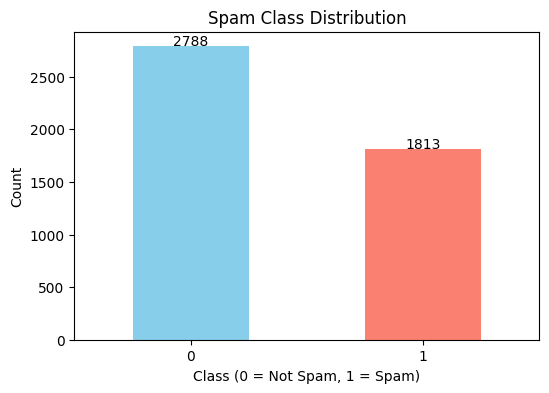

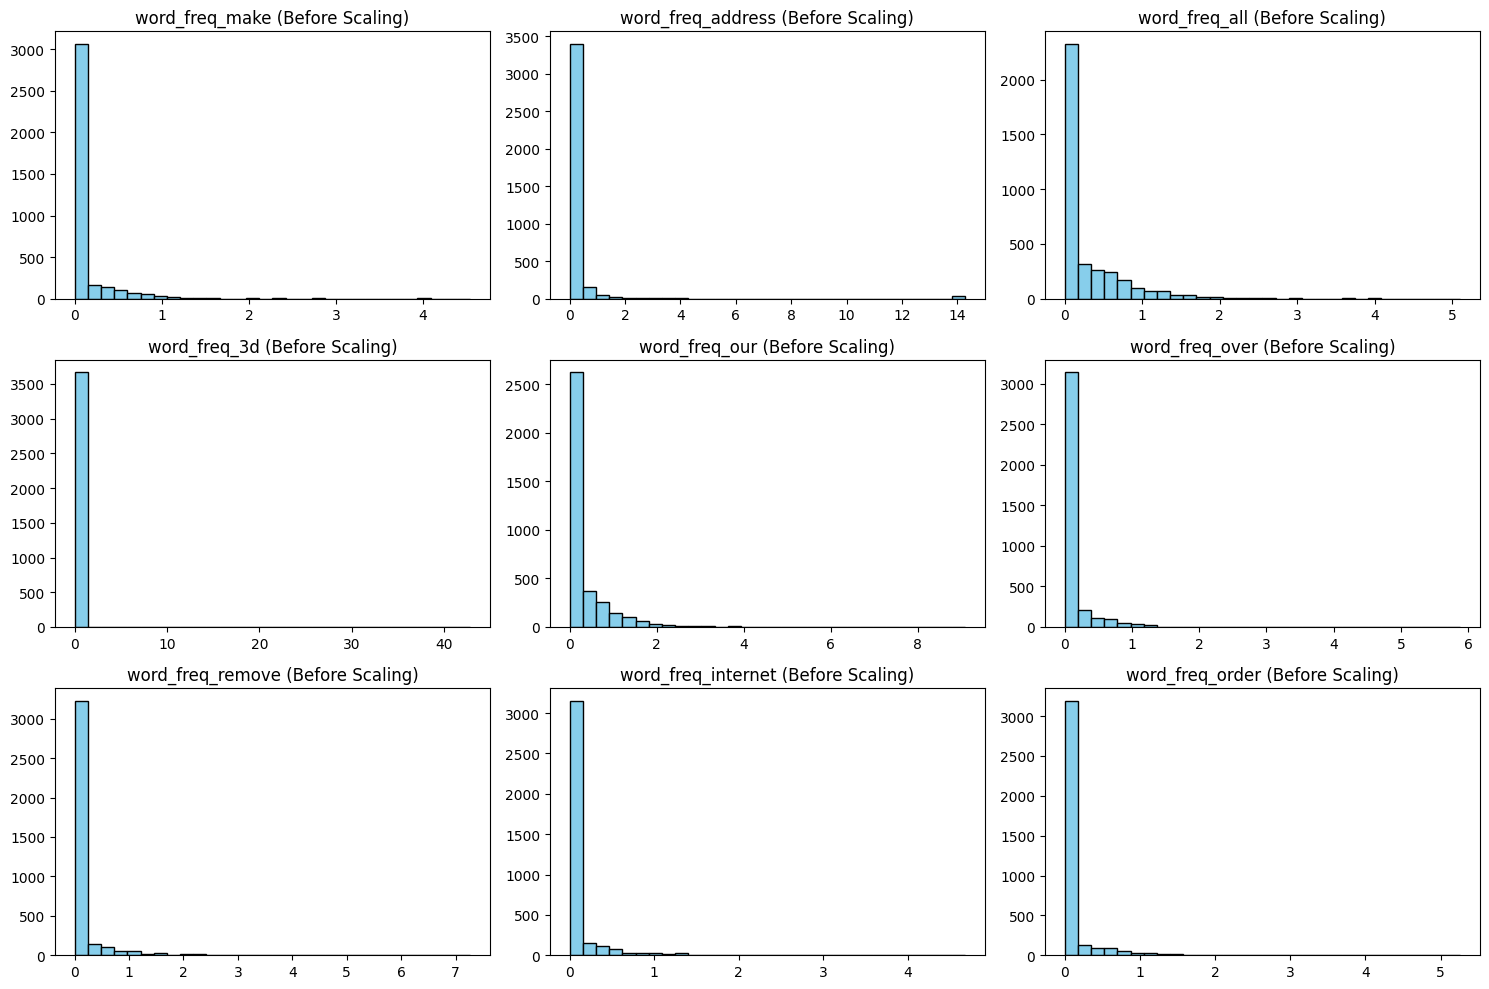

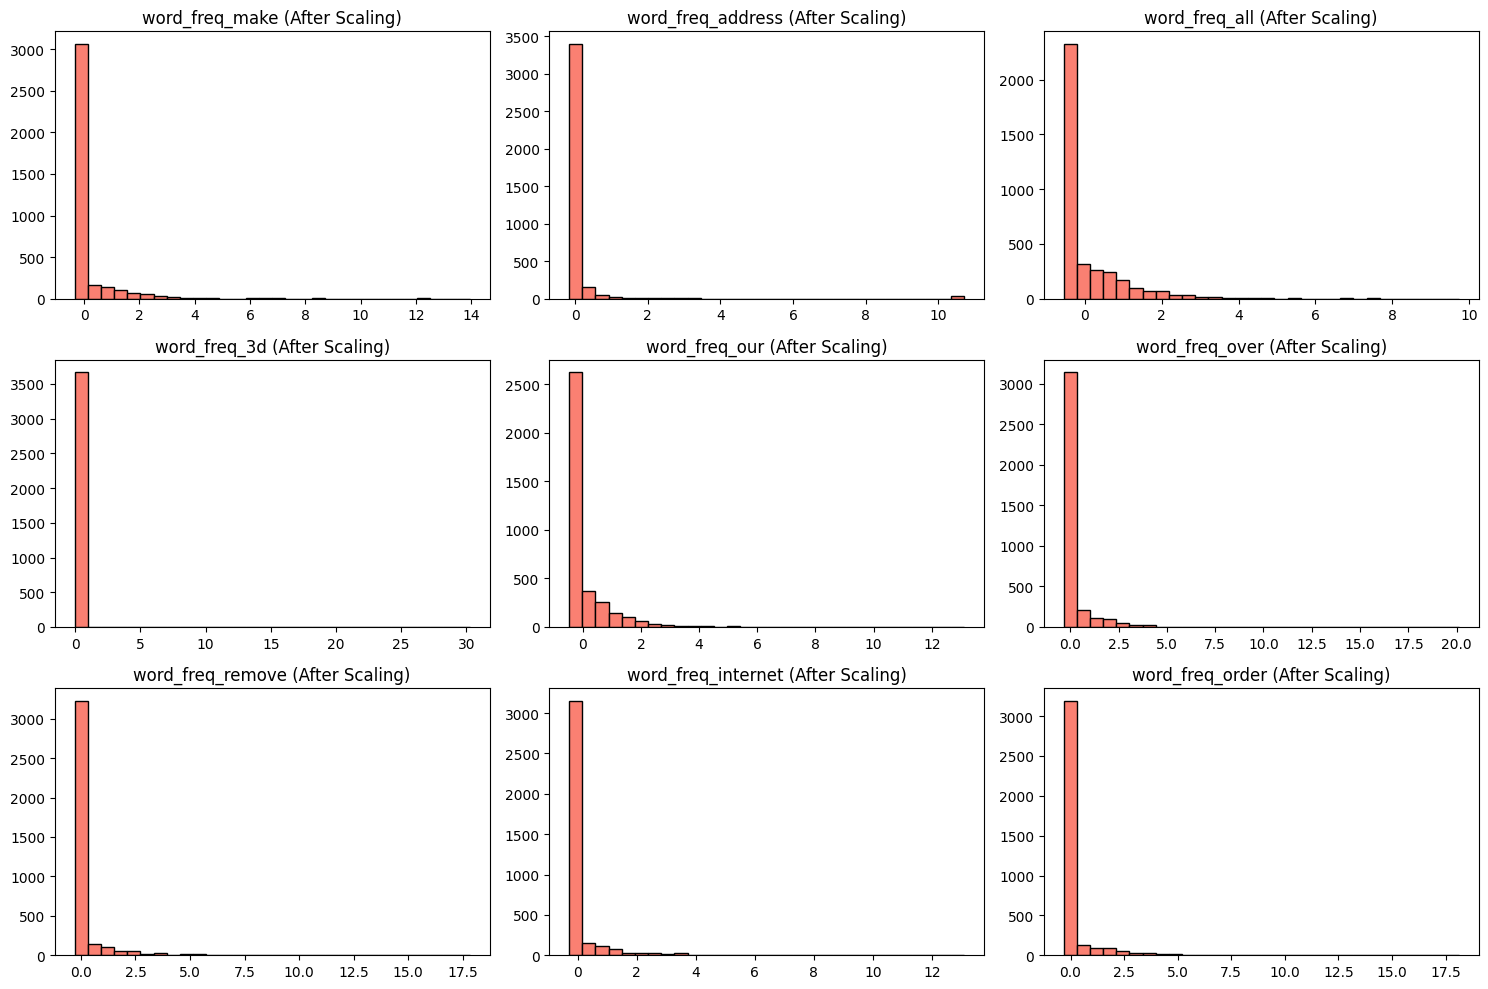

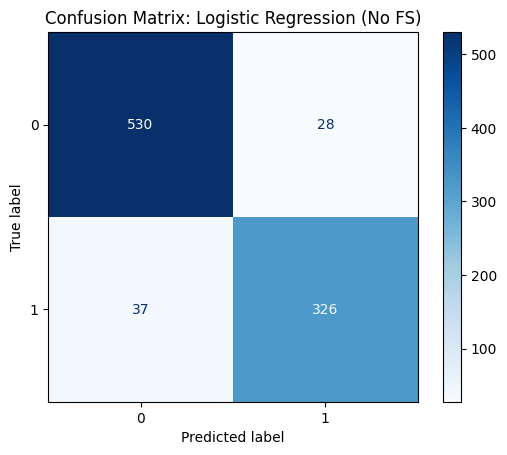

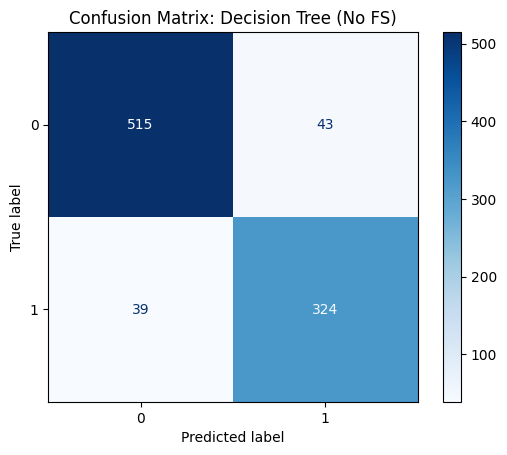

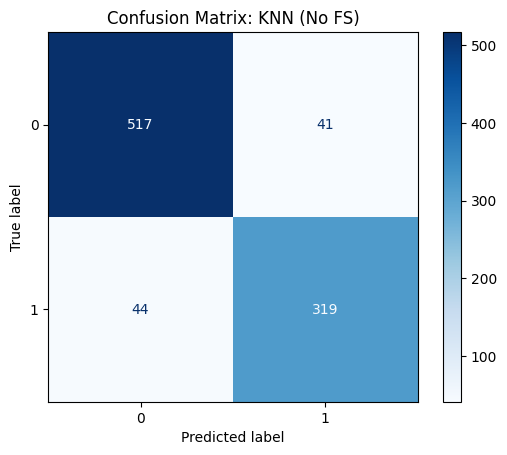

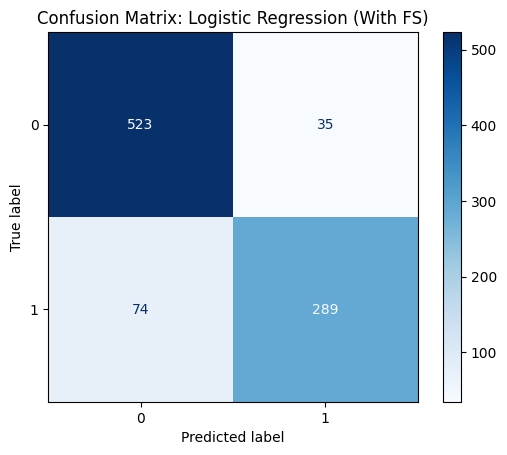

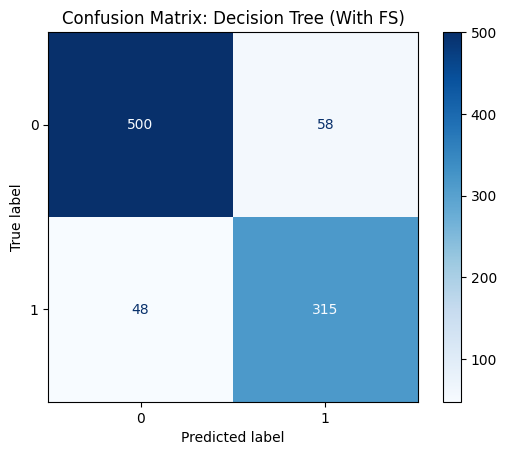

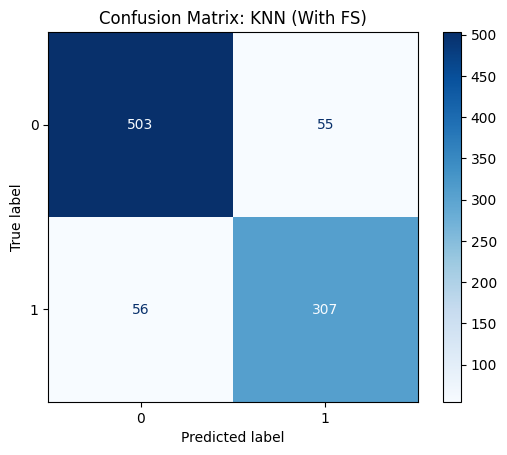


Quick Summary:
                               Accuracy  F1-Score    Time
Logistic Regression (No FS)      0.9294    0.9093  0.0187
Decision Tree (No FS)            0.9110    0.8877  0.0689
KNN (No FS)                      0.9077    0.8824  0.0012
Logistic Regression (With FS)    0.8817    0.8413  0.0110
Decision Tree (With FS)          0.8849    0.8560  0.0139
KNN (With FS)                    0.8795    0.8469  0.0046


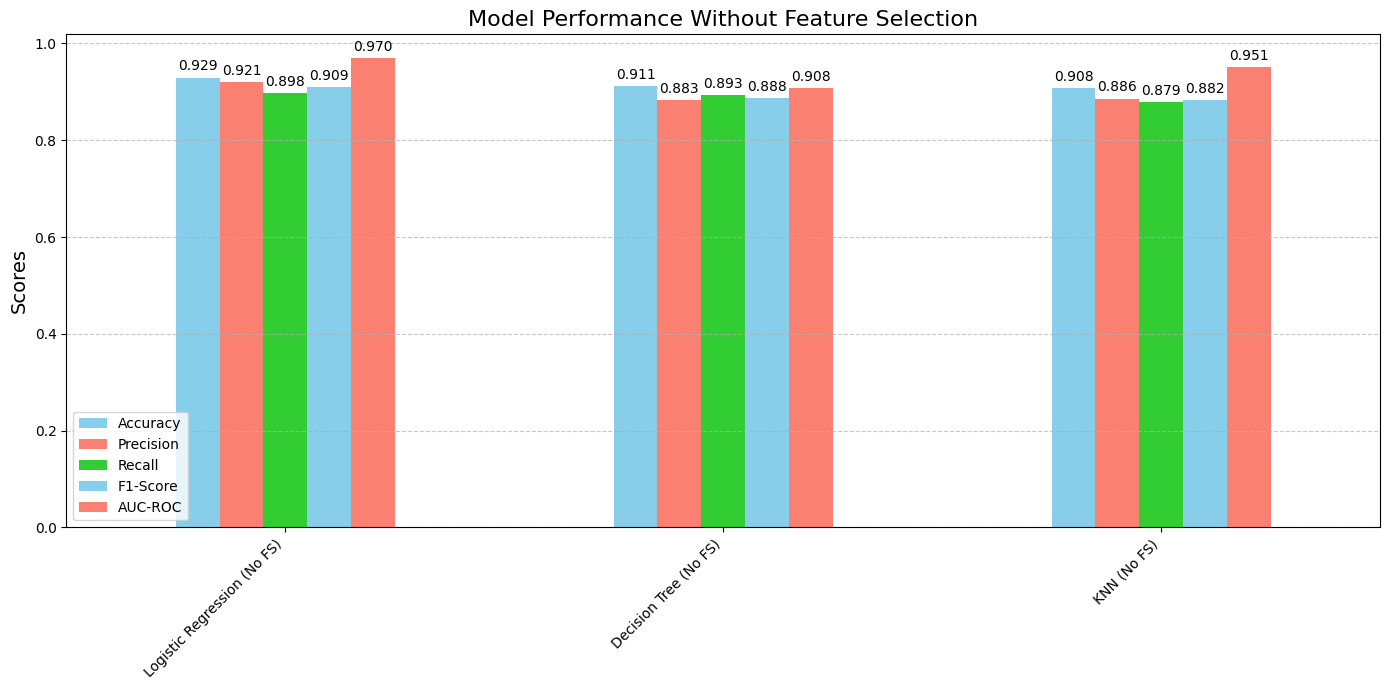

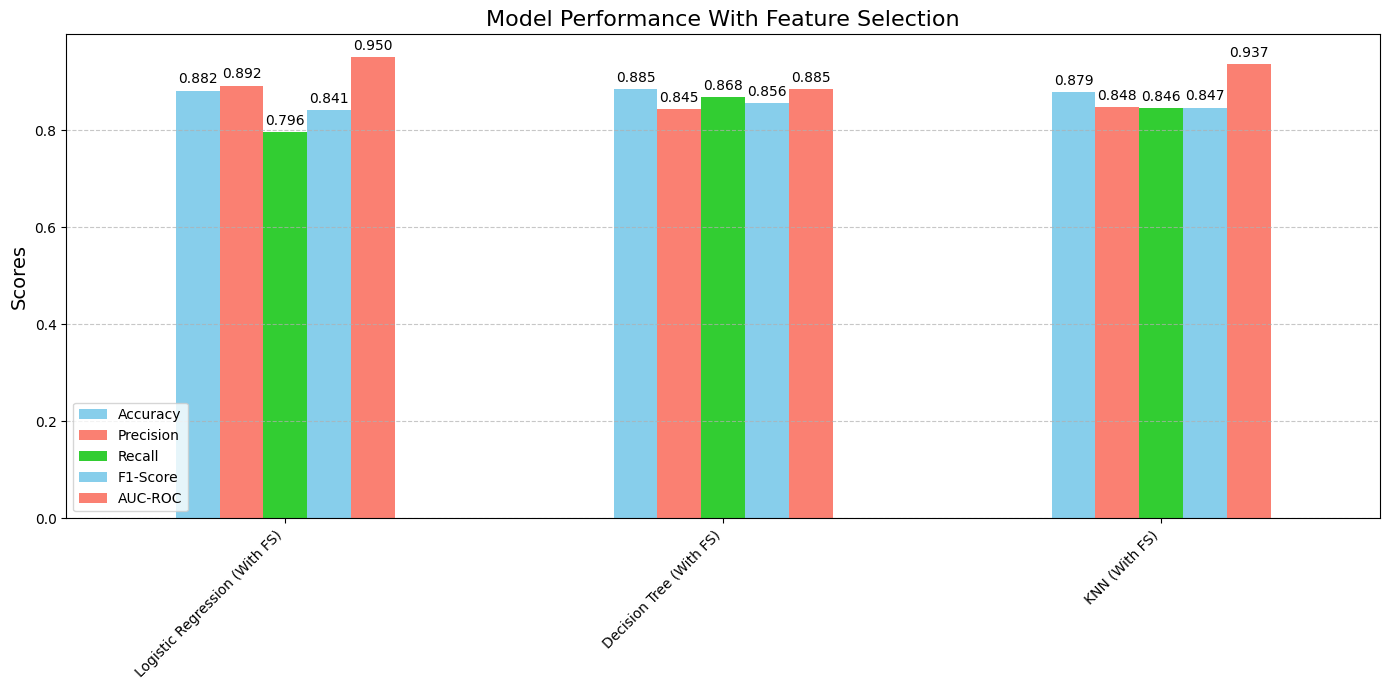

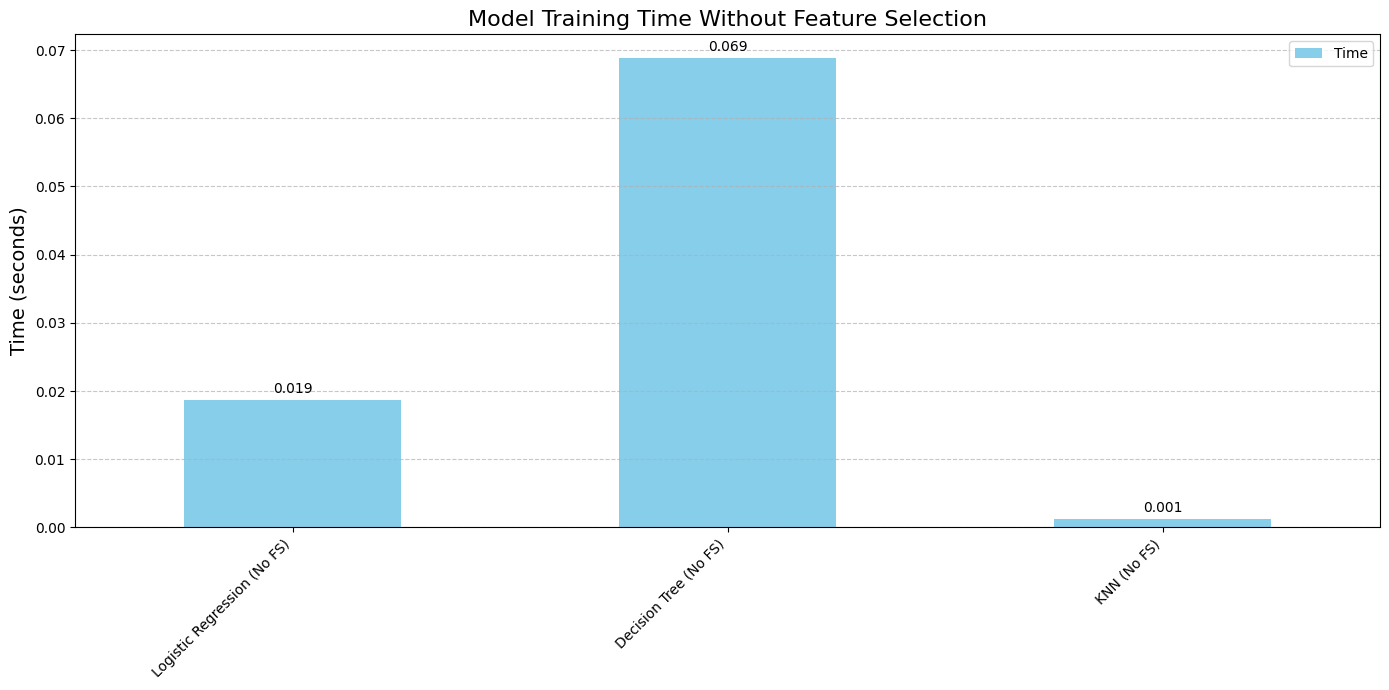

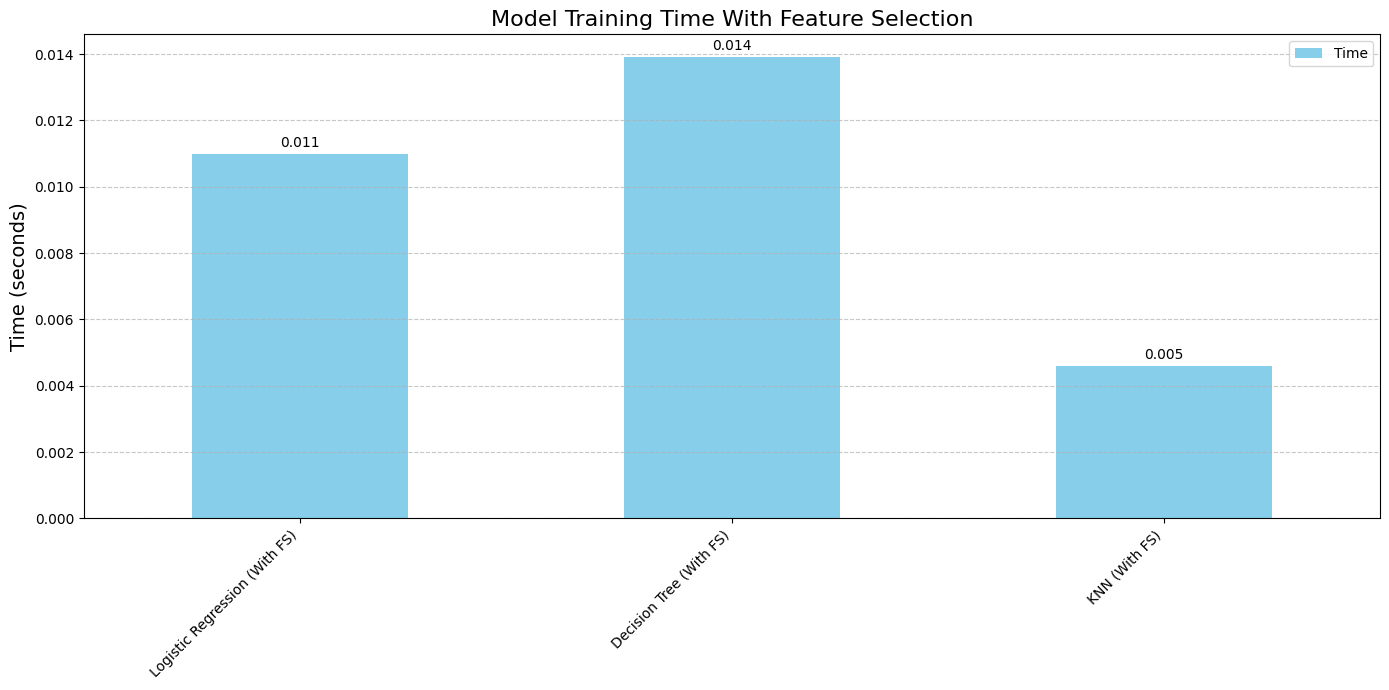

Model saved as spam_detection_model.joblib


['logistic_regression_model.pkl']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('Spam Detection .csv')

print("\n--- Dataset Info ---")
df.info()
print("\n--- Statistical Summary ---")
print(df.describe())
print("\n--- Spam Class Distribution ---")
print(df['spam'].value_counts())

# 📊 Plot Spam Class Distribution
plt.figure(figsize=(6, 4))
df['spam'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Spam Class Distribution')
plt.xlabel('Class (0 = Not Spam, 1 = Spam)')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, val in enumerate(df['spam'].value_counts()):
    plt.text(i, val + 5, str(val), ha='center', fontsize=10)
plt.show()

# Features and target
X = df.drop('spam', axis=1)
y = df['spam']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 📊 Plot feature distributions BEFORE scaling
plt.figure(figsize=(15, 10))
for i, col in enumerate(X_train.columns[:min(9, len(X_train.columns))]):  # limit to first 9 features
    plt.subplot(3, 3, i+1)
    plt.hist(X_train[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col} (Before Scaling)')
plt.tight_layout()
plt.show()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays to DataFrame for plotting
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# 📊 Plot feature distributions AFTER scaling
plt.figure(figsize=(15, 10))
for i, col in enumerate(X_train_scaled_df.columns[:min(9, len(X_train_scaled_df.columns))]):
    plt.subplot(3, 3, i+1)
    plt.hist(X_train_scaled_df[col], bins=30, color='salmon', edgecolor='black')
    plt.title(f'{col} (After Scaling)')
plt.tight_layout()
plt.show()
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection
k_features = 10
selector = SelectKBest(chi2, k=k_features)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)

# Scaling after feature selection
scaler_fs = StandardScaler()
X_train_kbest_scaled = scaler_fs.fit_transform(X_train_kbest)
X_test_kbest_scaled = scaler_fs.transform(X_test_kbest)

data_sets = {
    "without_fs": {"X_train": X_train_scaled, "X_test": X_test_scaled},
    "with_fs": {"X_train": X_train_kbest_scaled, "X_test": X_test_kbest_scaled},
}

def evaluate_model(model, X_train_data, X_test_data, y_train_data, y_test_data, title):
    start_time = time.time()
    model.fit(X_train_data, y_train_data)
    elapsed_time = time.time() - start_time

    y_pred = model.predict(X_test_data)
    y_prob = model.predict_proba(X_test_data)[:, 1] if hasattr(model, 'predict_proba') else None

    # Confusion Matrix
    cm = confusion_matrix(y_test_data, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {title}")
    plt.show()

    metrics = {
        'Accuracy': accuracy_score(y_test_data, y_pred),
        'Precision': precision_score(y_test_data, y_pred),
        'Recall': recall_score(y_test_data, y_pred),
        'F1-Score': f1_score(y_test_data, y_pred),
        'AUC-ROC': roc_auc_score(y_test_data, y_prob) if y_prob is not None else np.nan,
        'Time': elapsed_time
    }
    return metrics

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
}

# Evaluate models
results = {}
for name, model in models.items():
    metrics = evaluate_model(model, data_sets["without_fs"]["X_train"],
                             data_sets["without_fs"]["X_test"],
                             y_train, y_test,
                             title=f"{name} (No FS)")
    results[f"{name} (No FS)"] = metrics

for name, model in models.items():
    metrics = evaluate_model(model, data_sets["with_fs"]["X_train"],
                             data_sets["with_fs"]["X_test"],
                             y_train, y_test,
                             title=f"{name} (With FS)")
    results[f"{name} (With FS)"] = metrics

results_df = pd.DataFrame(results).T
results_df.columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Time']
print("\nQuick Summary:")
print(results_df[['Accuracy', 'F1-Score', 'Time']].round(4))

# Plotting results with separate bar charts and distinct colors
def plot_performance(results_df, title, ylabel='Scores'):
    ax = results_df.plot(kind='bar', figsize=(14, 7), color=['skyblue', 'salmon', 'limegreen'])
    plt.title(title, fontsize=16)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(loc='best')

    # Add values on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)

    plt.tight_layout()
    plt.show()

# Separate results for visualization
results_no_fs = results_df.loc[[idx for idx in results_df.index if "No FS" in idx]]
results_with_fs = results_df.loc[[idx for idx in results_df.index if "With FS" in idx]]

# Plot performance without and with feature selection separately
plot_performance(results_no_fs.drop('Time', axis=1), "Model Performance Without Feature Selection")
plot_performance(results_with_fs.drop('Time', axis=1), "Model Performance With Feature Selection")

# Plot execution time comparison separately
plot_performance(results_no_fs[['Time']], "Model Training Time Without Feature Selection", ylabel='Time (seconds)')
plot_performance(results_with_fs[['Time']], "Model Training Time With Feature Selection", ylabel='Time (seconds)')
import joblib

# The trained model object you want to save
model_to_save = model

# The filename to save the model to
filename = 'spam_detection_model.joblib'

# Save the model to the file
joblib.dump(model_to_save, filename)

print(f"Model saved as {filename}")

from sklearn.metrics import roc_curve

def evaluate_model(model, X_train_data, X_test_data, y_train_data, y_test_data, title):
    start_time = time.time()
    model.fit(X_train_data, y_train_data)
    elapsed_time = time.time() - start_time

    y_pred = model.predict(X_test_data)
    y_prob = model.predict_proba(X_test_data)[:, 1] if hasattr(model, 'predict_proba') else None

    # Confusion Matrix
    cm = confusion_matrix(y_test_data, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {title}")
    plt.show()

    # ROC Curve
    auc_score = np.nan
    if y_prob is not None:
        auc_score = roc_auc_score(y_test_data, y_prob)
        fpr, tpr, _ = roc_curve(y_test_data, y_prob)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.3f}')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"ROC Curve: {title}")
        plt.legend(loc="lower right")
        plt.grid(alpha=0.3)
        plt.show()

    metrics = {
        'Accuracy': accuracy_score(y_test_data, y_pred),
        'Precision': precision_score(y_test_data, y_pred),
        'Recall': recall_score(y_test_data, y_pred),
        'F1-Score': f1_score(y_test_data, y_pred),
        'AUC-ROC': auc_score,
        'Time': elapsed_time
    }
    return metrics
    import joblib

joblib.dump(models["KNN"], 'knn_model.pkl')
joblib.dump(models["Decision Tree"], 'decision_tree_model.pkl')
joblib.dump(models["Logistic Regression"], 'logistic_regression_model.pkl')
